In [4]:
import numpy as np
import qutip as qt

In [5]:
T = 10

def f(t,args):
    return t/T

In [6]:
f(10)

TypeError: f() missing 1 required positional argument: 'args'

In [9]:
import qutip as qt
import numpy as np

# --- PARAMETERS ---
T = 10
Delta = 0.2
times = np.linspace(0, T, 2000)

# --- OPERATORS ---
sigma_x = qt.sigmax()
sigma_z = qt.sigmaz()

# --- HAMILTONIAN ---
H = [
    [sigma_z, lambda t, args: t/T],
    [sigma_x, lambda t, args: Delta]
]

# --- INITIAL STATE (ground state of H(0)) ---
H0 = (0)*sigma_z + Delta*sigma_x
E0, eig0 = H0.eigenstates()
psi0 = eig0[0]

# --- SOLVE TDSE ---
result = qt.sesolve(H, psi0, times)
psi_T = result.states[-1]

# --- IDEAL FINAL STATE (ground state of H(T)) ---
HT = (1)*sigma_z + Delta*sigma_x
ET, eigT = HT.eigenstates()
psi_ideal = eigT[0]

# --- FIDELITY ---
overlap = psi_ideal.overlap(psi_T)   # already a complex number
F = abs(overlap)**2
print("Fidelity =", F)



Fidelity = 0.8397135867271683


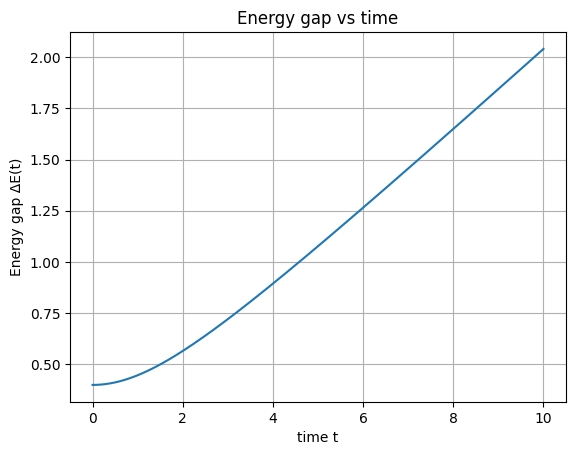

In [10]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10
Delta = 0.2
times = np.linspace(0, T, 400)

sigma_x = qt.sigmax()
sigma_z = qt.sigmaz()

def H_t(t):
    return (t/T)*sigma_z + Delta*sigma_x

gaps = []

for t in times:
    H = H_t(t)
    energies = H.eigenenergies()
    gap = energies[1] - energies[0]   # first excited - ground
    gaps.append(gap)

plt.plot(times, gaps)
plt.xlabel("time t")
plt.ylabel("Energy gap ΔE(t)")
plt.title("Energy gap vs time")
plt.grid()
plt.show()


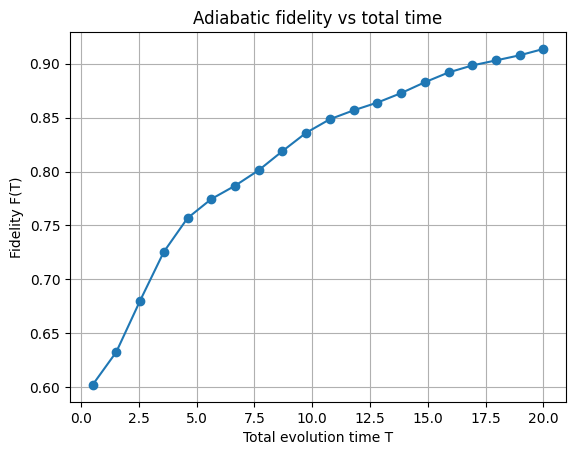

In [11]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

Delta = 0.2
sigma_x = qt.sigmax()
sigma_z = qt.sigmaz()

def fidelity_for_T(T):
    times = np.linspace(0, T, 1500)

    # Hamiltonian
    H = [
        [sigma_z, lambda t, args: t/T],
        [sigma_x, lambda t, args: Delta]
    ]

    # Initial state = ground state of H(0)
    H0 = Delta*sigma_x
    _, eigs0 = H0.eigenstates()
    psi0 = eigs0[0]

    # Evolve
    result = qt.sesolve(H, psi0, times)
    psi_T = result.states[-1]

    # Ideal final eigenstate
    HT = (1)*sigma_z + Delta*sigma_x
    _, eigsT = HT.eigenstates()
    psi_ideal = eigsT[0]

    # Fidelity
    return abs(psi_ideal.overlap(psi_T))**2

# Sweep over total evolution times
T_values = np.linspace(0.5, 20, 20)
F_values = [fidelity_for_T(T) for T in T_values]

plt.plot(T_values, F_values, marker='o')
plt.xlabel("Total evolution time T")
plt.ylabel("Fidelity F(T)")
plt.title("Adiabatic fidelity vs total time")
plt.grid()
plt.show()